In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#import final_data derived from Task3a

df = pd.read_csv('final_data.csv')

In [5]:
df.Attrition.value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [6]:
df.head()

,EmployeeNumber,Attrition,Age,Education,EducationField,Gender,MaritalStatus,Over18,EnvironmentSatisfaction,JobInvolvement_x,...,NumCompaniesWorked,OverTime,PercentSalaryHike_last_year,PerformanceRating,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41.0,College,Life Sciences,Female,Single,Y,Medium,High,...,8.0,Yes,11.0,Excellent,0.0,0,6,4,0,5
1,4,Yes,37.0,College,Other,Male,Single,Y,Very High,Medium,...,6.0,Yes,15.0,Excellent,0.0,3,0,0,0,0
2,19,Yes,28.0,Bachelor,Life Sciences,Male,Single,Y,High,Medium,...,5.0,Yes,14.0,Excellent,0.0,4,4,2,0,3
3,27,Yes,36.0,Master,Life Sciences,Male,Single,Y,High,Medium,...,7.0,No,23.0,Outstanding,0.0,4,5,3,0,3
4,31,Yes,34.0,Below College,Medical,Male,Single,Y,Medium,High,...,2.0,No,11.0,Excellent,0.0,2,4,2,1,3


In [7]:
df.describe()

,EmployeeNumber,Age,DistanceFromHome,JobLevel,MonthlySalary,NumCompaniesWorked,PercentSalaryHike_last_year,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,1024.865306,36.908163,9.234014,2.064626,5457.584354,2.692517,15.210884,0.794558,2.799320,7.008163,4.229252,2.187755,4.123129
std,602.024335,9.124903,8.263673,1.106593,3186.672684,2.496426,3.659115,0.851842,1.289271,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,491.250000,30.000000,2.000000,1.000000,2926.750000,1.000000,12.000000,0.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1020.500000,36.000000,7.000000,2.000000,4930.000000,2.000000,14.000000,1.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1555.750000,43.000000,14.000000,3.000000,6577.750000,4.000000,18.000000,1.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,2068.000000,60.000000,60.000000,5.000000,16555.000000,9.000000,25.000000,3.000000,6.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
df.isna().sum()

EmployeeNumber                      0
Attrition                           0
Age                                 0
Education                           0
EducationField                      0
Gender                              0
MaritalStatus                       0
Over18                              0
EnvironmentSatisfaction             0
JobInvolvement_x                    0
JobSatisfaction                     0
Manager_RelationshipSatisfaction    0
WorkLifeBalance                     0
Department                          0
BusinessTravel                      0
DistanceFromHome                    0
JobInvolvement_y                    0
JobLevel                            0
JobRole                             0
MonthlySalary                       0
NumCompaniesWorked                  0
OverTime                            0
PercentSalaryHike_last_year         0
PerformanceRating                   0
StockOptionLevel                    0
TrainingTimesLastYear               0
YearsAtCompa

In [9]:
df.duplicated().sum()

0

In [10]:
#Encode the df 

import pandas as pd

def encode_categorical(dataframe, label_encode_cols=None, one_hot_encode_cols=None):

    df_encoded = df.copy()
    
    # Label Encoding
    if label_encode_cols:
        for col in label_encode_cols:
            df_encoded[col] = df_encoded[col].map({'Yes': 1, 'No': 0, 'Y': 1, 'N': 0, 'Female':1, 'Male':0, 'Excellent':1, 'Outstanding': 0})
    
    # One-Hot Encoding
    if one_hot_encode_cols:
        df_encoded = pd.get_dummies(df_encoded, columns=one_hot_encode_cols, drop_first=True)
        df_encoded = df_encoded.fillna(0).astype(int)

    
    return df_encoded



# Define the columns for encoding
label_encode_cols = ['Attrition', 'Over18', 'OverTime',  'Gender', 'PerformanceRating']
one_hot_encode_cols = ['Education', 'EducationField', 'Gender', 'MaritalStatus', 
                       'EnvironmentSatisfaction', 'JobInvolvement_x','JobSatisfaction', 'BusinessTravel',
                       'Manager_RelationshipSatisfaction', 'WorkLifeBalance',  'Department', 'JobInvolvement_y', 'JobLevel', 'JobRole' ]

# Encode the DataFrame
encoded_df = encode_categorical(df, label_encode_cols, one_hot_encode_cols)



In [11]:
encoded_df.head()

,EmployeeNumber,Attrition,Age,Over18,DistanceFromHome,MonthlySalary,NumCompaniesWorked,OverTime,PercentSalaryHike_last_year,PerformanceRating,...,JobLevel_4.0,JobLevel_5.0,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,1,1,41,1,1,5993,8,1,11,1,...,0,0,0,0,0,0,0,0,1,0
1,4,1,37,1,2,2090,6,1,15,1,...,0,0,0,1,0,0,0,0,0,0
2,19,1,28,1,24,2028,5,1,14,1,...,0,0,0,1,0,0,0,0,0,0
3,27,1,36,1,9,3407,7,0,23,0,...,0,0,0,0,0,0,0,0,0,1
4,31,1,34,1,6,2960,2,0,11,1,...,0,0,0,0,0,0,0,1,0,0


## Feature Selection

In [12]:

# Correlation of demographic variables with Attrition

demographic_cols = ['Age', 'Over18', 'DistanceFromHome','Over18', 'Gender_1',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'Education_Below College', 'Education_College', 'Education_Doctor',
       'Education_Master', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree']

# Calculate correlations
demographic_corr = encoded_df[demographic_cols + ['Attrition']].corr()

# Display the correlation matrix for satisfaction variables
print("Correlation between satisfaction variables and Attrition:")
print(demographic_corr['Attrition'].sort_values(ascending=False))



Correlation between satisfaction variables and Attrition:
Attrition                          1.000000
MaritalStatus_Single               0.172189
DistanceFromHome                   0.082528
EducationField_Technical Degree    0.069355
EducationField_Marketing           0.056899
Over18                             0.028067
Over18                             0.028067
Education_Below College            0.020777
Education_College                 -0.010840
EducationField_Other              -0.020046
Education_Master                  -0.025024
Education_Doctor                  -0.028507
Gender_1                          -0.028853
EducationField_Life Sciences      -0.033131
EducationField_Medical            -0.046384
MaritalStatus_Married             -0.090984
Age                               -0.158636
Name: Attrition, dtype: float64


In [13]:
# Correlation of satisfaction variables with Attrition

satisfaction_cols = ['EnvironmentSatisfaction_Low', 'EnvironmentSatisfaction_Medium',
                     'JobSatisfaction_Low', 'JobSatisfaction_Medium',
       'JobSatisfaction_Very High', 'Manager_RelationshipSatisfaction_Low',
       'Manager_RelationshipSatisfaction_Medium',
       'Manager_RelationshipSatisfaction_Very High',
       'Manager_RelationshipSatisfaction_Medium']

# Calculate correlations
satisfaction_corr = encoded_df[satisfaction_cols + ['Attrition']].corr()

# Display the correlation matrix for satisfaction variables
print("Correlation between satisfaction variables and Attrition:")
print(satisfaction_corr['Attrition'].sort_values(ascending=False))



Correlation between satisfaction variables and Attrition:
Attrition                                     1.000000
EnvironmentSatisfaction_Low                   0.122819
JobSatisfaction_Low                           0.090329
Manager_RelationshipSatisfaction_Low          0.059222
JobSatisfaction_Medium                        0.004038
EnvironmentSatisfaction_Medium               -0.015267
Manager_RelationshipSatisfaction_Medium      -0.017611
Manager_RelationshipSatisfaction_Medium      -0.017611
Manager_RelationshipSatisfaction_Very High   -0.022940
JobSatisfaction_Very High                    -0.087830
Name: Attrition, dtype: float64


In [14]:
# Correlation of job related variables with Attrition

job_cols = ['MonthlySalary', 'OverTime', 'WorkLifeBalance_Best',
       'WorkLifeBalance_Better', 'WorkLifeBalance_Good','BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely',
       'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'JobLevel_2.0', 'JobLevel_3.0',
       'JobLevel_4.0', 'JobLevel_5.0', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative']

# Calculate correlations
job_corr = encoded_df[job_cols + ['Attrition']].corr()

# Display the correlation matrix for satisfaction variables
print("Correlation between satisfaction variables and Attrition:")
print(job_corr['Attrition'].sort_values(ascending=False))



Correlation between satisfaction variables and Attrition:
Attrition                           1.000000
OverTime                            0.246118
JobRole_Sales Representative        0.157234
BusinessTravel_Travel_Frequently    0.115143
JobRole_Laboratory Technician       0.098290
JobRole_Human Resources             0.036215
JobRole_Sales Executive             0.019036
WorkLifeBalance_Best                0.014131
WorkLifeBalance_Good                0.011093
JobRole_Research Scientist         -0.000360
JobLevel_3.0                       -0.016380
YearsSinceLastPromotion            -0.033019
BusinessTravel_Travel_Rarely       -0.049538
JobLevel_5.0                       -0.053566
WorkLifeBalance_Better             -0.064301
JobRole_Manager                    -0.082518
JobRole_Manufacturing Director     -0.082994
JobLevel_4.0                       -0.086461
JobRole_Research Director          -0.088870
JobLevel_2.0                       -0.131706
YearsAtCompany                     -0.1343

In [15]:

# Correlation of demographic variables with Attrition

all_cols = ['Age', 'Over18', 'DistanceFromHome', 'Gender_1',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'Education_Below College', 'Education_College', 'Education_Doctor',
       'Education_Master', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree', 'EnvironmentSatisfaction_Low', 'EnvironmentSatisfaction_Medium',
                     'JobSatisfaction_Low', 'JobSatisfaction_Medium',
       'JobSatisfaction_Very High', 'Manager_RelationshipSatisfaction_Low',
       'Manager_RelationshipSatisfaction_Medium',
       'Manager_RelationshipSatisfaction_Very High',
       'Manager_RelationshipSatisfaction_Medium', 'MonthlySalary', 'OverTime', 'WorkLifeBalance_Best',
       'WorkLifeBalance_Better', 'WorkLifeBalance_Good','BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely',
       'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'JobLevel_2.0', 'JobLevel_3.0',
       'JobLevel_4.0', 'JobLevel_5.0', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative']

# Calculate correlations
all_cols_corr = encoded_df[all_cols + ['Attrition']].corr()

# Display the correlation matrix for satisfaction variables
print("Correlation between all variables and Attrition:")
print(all_cols_corr['Attrition'].sort_values(ascending=False))



Correlation between all variables and Attrition:
Attrition                                     1.000000
OverTime                                      0.246118
MaritalStatus_Single                          0.172189
JobRole_Sales Representative                  0.157234
EnvironmentSatisfaction_Low                   0.122819
BusinessTravel_Travel_Frequently              0.115143
JobRole_Laboratory Technician                 0.098290
JobSatisfaction_Low                           0.090329
DistanceFromHome                              0.082528
EducationField_Technical Degree               0.069355
Manager_RelationshipSatisfaction_Low          0.059222
EducationField_Marketing                      0.056899
JobRole_Human Resources                       0.036215
Over18                                        0.028067
Education_Below College                       0.020777
JobRole_Sales Executive                       0.019036
WorkLifeBalance_Best                          0.014131
WorkLifeBalance_

In [16]:
# Select features showing maximum correlation with Attrition

selected_features= ['OverTime', 'JobRole_Sales Representative', 'BusinessTravel_Travel_Frequently','JobRole_Laboratory Technician', 'JobLevel_5.0',
                    'WorkLifeBalance_Better','JobRole_Manager', 'JobRole_Manufacturing Director', 'JobLevel_4.0', 'JobRole_Research Director', 
                    'JobLevel_2.0', 'YearsAtCompany', 'MonthlySalary', 'YearsWithCurrManager', 'YearsInCurrentRole','MaritalStatus_Single',
                    'DistanceFromHome','EducationField_Technical Degree','EducationField_Marketing','EducationField_Medical','MaritalStatus_Married',
                    'Age', 'EnvironmentSatisfaction_Low','JobSatisfaction_Low','JobSatisfaction_Very High','Manager_RelationshipSatisfaction_Low', 'Attrition']

df_selected= encoded_df[selected_features]
                    

## Model Building

In [17]:
X= df_selected.drop(columns= ['Attrition'])

In [18]:
y= df_selected['Attrition']

In [19]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

In [74]:
#Train-test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2,random_state= 42)

In [75]:
import statsmodels.api as sm

# Add constant for intercept term

X_train_const = sm.add_constant(X_train)

# Fit the logistic regression model

logit_model = sm.Logit(y_train, X_train_const)
result = logit_model.fit()

# Print the model summary

print(result.summary())


         Current function value: 0.311177
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1176
Model:                          Logit   Df Residuals:                     1149
Method:                           MLE   Df Model:                           26
Date:                Thu, 12 Jun 2025   Pseudo R-squ.:                  0.3094
Time:                        15:54:55   Log-Likelihood:                -365.94
converged:                      False   LL-Null:                       -529.86
Covariance Type:            nonrobust   LLR p-value:                 5.497e-54
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -2.5856      0.557     -4.640      0.000      -3.678

C:\Users\karis\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [76]:


# Make predictions on the train and test data

y_train_pred = result.predict(sm.add_constant(X_train))
y_test_pred = result.predict(sm.add_constant(X_test))

# Convert predicted probabilities to binary outcomes (using 0.5 threshold)
y_train_pred_bin = (y_train_pred > 0.5).astype(int)
y_test_pred_bin = (y_test_pred > 0.5).astype(int)




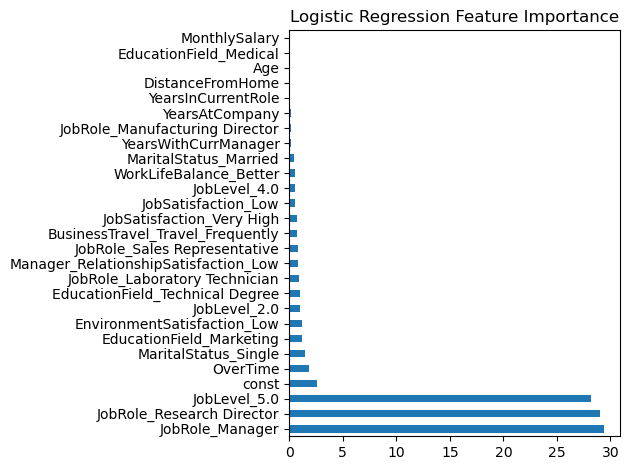

In [77]:
import matplotlib.pyplot as plt

importance = result.params.abs().sort_values(ascending=False)
importance.plot(kind='barh', title='Logistic Regression Feature Importance')
plt.tight_layout()
plt.show()

In [78]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

### Calculate goodness of fit metrices
### Validate the model by comparing performance metrics (confusion matrix, classification report, ROC-AUC score) on both the train and test data. 


In [79]:
# Confusion matrix
print("Train Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred_bin))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_bin))



Train Confusion Matrix:
[[956  24]
 [116  80]]
Test Confusion Matrix:
[[243  10]
 [ 32   9]]


In [80]:
# Classification report
print("Train Classification Report:")
print(classification_report(y_train, y_train_pred_bin))
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred_bin))



Train Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       980
           1       0.77      0.41      0.53       196

    accuracy                           0.88      1176
   macro avg       0.83      0.69      0.73      1176
weighted avg       0.87      0.88      0.87      1176

Test Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       253
           1       0.47      0.22      0.30        41

    accuracy                           0.86       294
   macro avg       0.68      0.59      0.61       294
weighted avg       0.83      0.86      0.83       294



In [81]:
# ROC-AUC score
train_roc_auc = roc_auc_score(y_train, y_train_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)
print(f"Train ROC-AUC score: {train_roc_auc}")
print(f"Test ROC-AUC score: {test_roc_auc}")



Train ROC-AUC score: 0.8551697209496044
Test ROC-AUC score: 0.7901282174877085


In [82]:
# ROC Curve
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred)



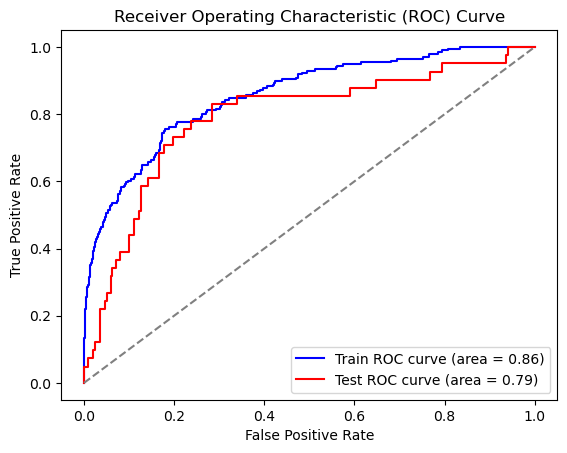

In [83]:

plt.figure()
plt.plot(fpr_train, tpr_train, color='blue', label='Train ROC curve (area = %0.2f)' % train_roc_auc)
plt.plot(fpr_test, tpr_test, color='red', label='Test ROC curve (area = %0.2f)' % test_roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Resampling using SMOTE as data is imbalanced

In [84]:
from imblearn.over_sampling import SMOTE

# Resample after splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Add constant
X_train_const = sm.add_constant(X_train_resampled)
X_test_const=sm.add_constant(X_test)

# Fit the model
logit_model1 = sm.Logit(y_train_resampled, X_train_const)
result1 = logit_model1.fit()

# Summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.390212
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1176
Model:                          Logit   Df Residuals:                     1149
Method:                           MLE   Df Model:                           26
Date:                Thu, 12 Jun 2025   Pseudo R-squ.:                  0.3094
Time:                        15:55:03   Log-Likelihood:                -365.94
converged:                      False   LL-Null:                       -529.86
Covariance Type:            nonrobust   LLR p-value:                 5.497e-54
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -2.5856      0.5

In [85]:
print(X_train.shape)
print(y_train.shape)
print(X_train_resampled.shape)
print(y_train_resampled.shape)

(1176, 26)
(1176,)
(1972, 26)
(1972,)


In [86]:


# Make predictions on the train and test data

y_train_pred1 = result1.predict(X_train_const)
y_test_pred1 = result1.predict(X_test_const)

# Convert predicted probabilities to binary outcomes (using 0.5 threshold)
y_train_pred_bin1 = (y_train_pred1 > 0.5).astype(int)
y_test_pred_bin1 = (y_test_pred1 > 0.5).astype(int)




In [91]:
# Confusion matrix
print("Train Confusion Matrix:")
print(confusion_matrix(y_train_resampled, y_train_pred_bin1))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_bin1))



Train Confusion Matrix:
[[807 179]
 [162 824]]
Test Confusion Matrix:
[[190  57]
 [ 26  21]]


In [92]:
# Classification report
print("Train Classification Report:")
print(classification_report(y_train_resampled, y_train_pred_bin1))
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred_bin1))



Train Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       986
           1       0.82      0.84      0.83       986

    accuracy                           0.83      1972
   macro avg       0.83      0.83      0.83      1972
weighted avg       0.83      0.83      0.83      1972

Test Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       247
           1       0.27      0.45      0.34        47

    accuracy                           0.72       294
   macro avg       0.57      0.61      0.58       294
weighted avg       0.78      0.72      0.74       294



In [93]:
# ROC Curve
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_resampled, y_train_pred1)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred1)



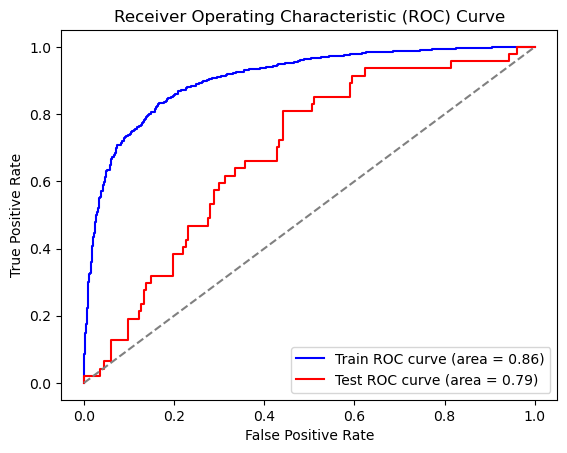

In [94]:

plt.figure()
plt.plot(fpr_train, tpr_train, color='blue', label='Train ROC curve (area = %0.2f)' % train_roc_auc)
plt.plot(fpr_test, tpr_test, color='red', label='Test ROC curve (area = %0.2f)' % test_roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [100]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [101]:

# Make predictions on the train and test data

y_pred = rf.predict(X_test)
